In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('filtered.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Min Salary,Max Salary,Average Salary,Job State,Age,Python,Spark
0,Data Scientist 2,52 - 95,Description\nDigital Health and Analytics with...,3.9,Humana\n3.9,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,KY,59,1,1
1,Lead Data Scientist,94 - 155,Description\nThe Lead Data Scientist uses math...,3.9,Humana\n3.9,"Boston, MA",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),94,155,124.5,MA,59,0,0
2,Environmental Scientist/Risk Assessor,28 - 48,The desired candidate will be located in any o...,3.8,Integral Consulting Inc.\n3.8,"Annapolis, MD",51 to 200 Employees,-1,Company - Private,Consulting,Business Services,$10 to $25 million (USD),28,48,38.0,MD,-1,0,0
3,Data Analyst,47 - 87,It's fun to work in a company where people tru...,4.1,MMM Holdings\n4.1,"Orlando, FL",1001 to 5000 Employees,-1,Company - Private,Insurance Carriers,Insurance,Less than $1 million (USD),47,87,67.0,FL,-1,0,0
4,Data Scientist,87 - 142,"At Farm Credit Mid-America, we believe people ...",4.1,Farm Credit Mid-America\n4.1,"Louisville, KY",1001 to 5000 Employees,1985,Company - Private,Lending,Finance,$100 to $500 million (USD),87,142,114.5,KY,35,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Min Salary', 'Max Salary',
       'Average Salary', 'Job State', 'Age', 'Python', 'Spark'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning engineer' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)

In [8]:
df['Job Simplified'].value_counts()

data scientist    498
analyst            72
na                 54
data engineer      38
manager             7
director            6
mle                 6
Name: Job Simplified, dtype: int64

In [9]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [10]:
df['Seniority'].value_counts()

na        609
senior     71
jr          1
Name: Seniority, dtype: int64

In [11]:
df['Job State'].value_counts()

CA    158
NY     82
VA     68
MA     59
TX     47
PA     33
NJ     31
NC     24
AR     21
MD     18
LA     17
OH     14
WA     11
IL     11
GA     10
FL     10
DC      9
UT      8
WI      8
MO      5
NM      4
MI      4
MN      4
KY      3
CT      3
AZ      3
IN      3
NE      3
MS      2
CO      2
ID      2
DE      1
IA      1
AL      1
RI      1
Name: Job State, dtype: int64

In [12]:
df['Description Length'] = df['Job Description'].apply(lambda x: len(x))

In [13]:
df['Description Length']

0      3525
1      2222
2      2648
3      1997
4      6569
       ... 
676    3013
677    5055
678    3777
679    1330
680    3608
Name: Description Length, Length: 681, dtype: int64

In [15]:
df['Company Name'] = df['Company Name'].apply(lambda x:x.split('\n')[0])

In [18]:
df.describe()

,Rating,Founded,Min Salary,Max Salary,Average Salary,Age,Python,Spark,Description Length
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,3.746843,1858.337739,74.972100,126.198238,100.585169,42.895742,0.701909,0.286344,3868.549192
std,0.485883,467.419182,23.485304,34.692266,28.790025,50.496383,0.457756,0.452384,1831.939551
min,2.000000,-1.000000,17.000000,45.000000,35.000000,-1.000000,0.000000,0.000000,799.000000
25%,3.400000,1961.000000,60.000000,106.000000,83.500000,11.000000,0.000000,0.000000,2805.000000
50%,3.700000,1994.000000,72.000000,123.000000,98.000000,23.000000,1.000000,0.000000,3608.000000
75%,4.100000,2008.000000,88.000000,146.000000,117.000000,51.000000,1.000000,1.000000,4672.000000
max,5.000000,2020.000000,165.000000,257.000000,211.000000,190.000000,1.000000,1.000000,10277.000000


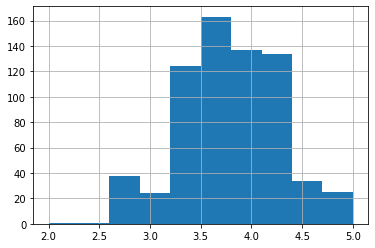

In [21]:
df.Rating.hist()

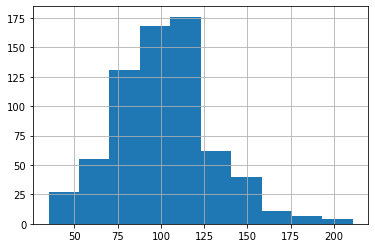

In [23]:
df['Average Salary'].hist()

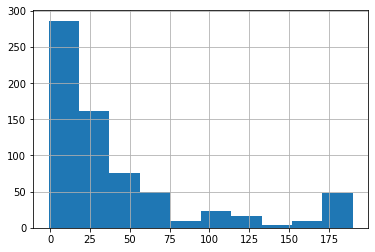

In [24]:
df['Age'].hist()

In [26]:
pd.pivot_table(df, index='Job Simplified', values='Average Salary')

,Average Salary
Job Simplified,
analyst,67.055556
data engineer,103.842105
data scientist,106.630522
director,133.250000
manager,105.857143
mle,134.833333
na,79.129630


In [30]:
df.to_csv('filtered.csv', index=False)